In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
url = "http://grafins.com/ml/compressed_data.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('.')

In [ ]:
#imports
import numpy as np
import pandas as pd 
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
import math
import random

In [ ]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
data_dir = './compressed_data/train/'
img_size = 50
def get_data():
  data = []
  x_data = []
  y_data = []
  i=0;
  for label in labels:
    path = os.path.join(data_dir,label)
    print("Extracting",label)
    for img in os.listdir(path):
      try:
        image = cv2.imread(os.path.join(path,img),0)
        image = cv2.resize(image,(img_size,img_size))
        data.append([image,i])
      except Exception as e:
        print(e)
    i+=1
  random.shuffle(data)
  for d in data:
    x_data.append(d[0])
    y_data.append(d[1])
  print(len(x_data),len(y_data))
  return np.array(x_data),np.array(y_data),len(x_data)

  



In [ ]:
  x, y, size = get_data()

Extracting A
Extracting B
Extracting C
Extracting D
Extracting E
Extracting F
Extracting G
Extracting H
Extracting I
Extracting J
Extracting K
Extracting L
Extracting M
Extracting N
Extracting O
Extracting P
Extracting Q
Extracting R
Extracting S
Extracting T
Extracting U
Extracting V
Extracting W
Extracting X
Extracting Y
Extracting Z
78000 78000


In [ ]:
split = math.ceil(size*0.9)
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

In [ ]:
print(y_test)

[ 5 11 14 ... 25 12 24]


In [ ]:
model = Sequential([Conv2D(32,(5,5),activation="relu",input_shape=(img_size,img_size,1))])
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(26,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1755/1755 [==============================] - 52s 13ms/step - loss: 1.4257 - accuracy: 0.6014 - val_loss: 0.3380 - val_accuracy: 0.8871
Epoch 2/10
1755/1755 [==============================] - 22s 12ms/step - loss: 0.2407 - accuracy: 0.9177 - val_loss: 0.1300 - val_accuracy: 0.9580
Epoch 3/10
1755/1755 [==============================] - 22s 13ms/step - loss: 0.1565 - accuracy: 0.9506 - val_loss: 0.1173 - val_accuracy: 0.9616
Epoch 4/10
1755/1755 [==============================] - 22s 13ms/step - loss: 0.1189 - accuracy: 0.9634 - val_loss: 0.1182 - val_accuracy: 0.9616
Epoch 5/10
1755/1755 [==============================] - 22s 13ms/step - loss: 0.1002 - accuracy: 0.9693 - val_loss: 0.0706 - val_accuracy: 0.9774
Epoch 6/10
1755/1755 [==============================] - 22s 12ms/step - loss: 0.0807 - accuracy: 0.9774 - val_loss: 0.1889 - val_accuracy: 0.9573
Epoch 7/10
1755/1755 [==============================] - 21s 12ms/step - loss: 0.0888 - accuracy: 0.9758 - val_loss: 0.0658 -

In [ ]:
#np.seterr(divide = 'ignore') 
model.evaluate(x_test,y_test)

244/244 [==============================] - 1s 6ms/step - loss: 0.0952 - accuracy: 0.9749


[0.0951530858874321, 0.974871814250946]

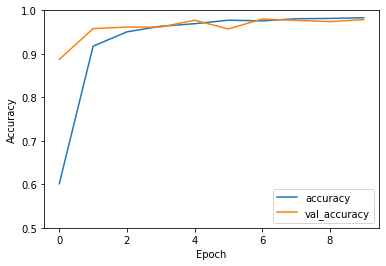

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

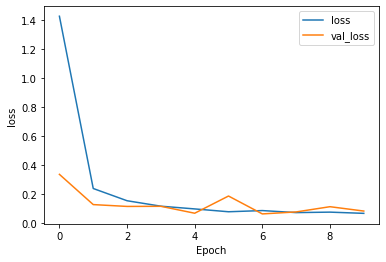

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

In [ ]:
history.history

{'accuracy': [0.6405649185180664,
  0.924919843673706,
  0.9566506147384644,
  0.9645032286643982,
  0.9698517918586731],
 'loss': [1.2358390092849731,
  0.2306492179632187,
  0.13528242707252502,
  0.11964049935340881,
  0.1080845445394516],
 'val_accuracy': [0.8644230961799622,
  0.956250011920929,
  0.9715544581413269,
  0.9492788314819336,
  0.9713942408561707],
 'val_loss': [0.40244555473327637,
  0.14224538207054138,
  0.09039025753736496,
  0.16312731802463531,
  0.08727652579545975]}

In [ ]:
model1 = Sequential([Conv2D(32,(5,5),activation="relu",input_shape=(img_size,img_size,1))])
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(26,activation='softmax'))



In [ ]:
model1=Sequential([])

model1.add(Conv2D(64,(3,3),activation="relu",input_shape=(img_size,img_size,1)))
model1.add(BatchNormalization())
model1.add(Conv2D(64,(3,3),activation="relu",input_shape=(img_size,img_size,1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128,(3,3),activation="relu"))
model1.add(BatchNormalization())
model1.add(Conv2D(128,(3,3),activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dense(256,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dense(26,activation="softmax"))

In [ ]:
model1.summary()

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
from keras.callbacks import *
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
history=model1.fit(x_train, y_train, epochs=10, validation_split = 0.2,callbacks=[callback,annealer])

Epoch 1/10
1755/1755 [==============================] - 64s 36ms/step - loss: 0.4916 - accuracy: 0.8543 - val_loss: 0.5876 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 2/10
1755/1755 [==============================] - 63s 36ms/step - loss: 0.0699 - accuracy: 0.9794 - val_loss: 0.2226 - val_accuracy: 0.9325 - lr: 9.5000e-04
Epoch 3/10
1755/1755 [==============================] - 64s 36ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.1842 - val_accuracy: 0.9431 - lr: 9.0250e-04
Epoch 4/10
1755/1755 [==============================] - 64s 36ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0456 - val_accuracy: 0.9850 - lr: 8.5737e-04
Epoch 5/10
1755/1755 [==============================] - 63s 36ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.1482 - val_accuracy: 0.9619 - lr: 8.1451e-04
Epoch 6/10
1755/1755 [==============================] - 63s 36ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 1.6183 - val_accuracy: 0.6589 - lr: 7.7378e-04
Epoch 7/10
1755/1755 [====

In [ ]:
model1.save("asl_recognition_2.h5")
print("model 2 saved")

model 2 saved


In [ ]:
model1.evaluate(x_test,y_test)

244/244 [==============================] - 3s 13ms/step - loss: 0.0081 - accuracy: 0.9968


[0.008114217780530453, 0.9967948794364929]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
traingen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

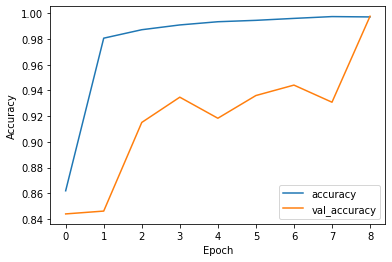

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

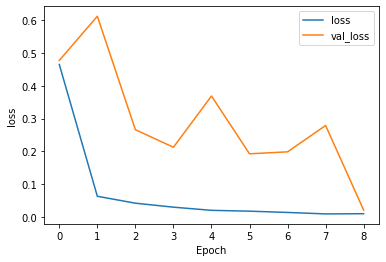

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

In [ ]:
counts = [0]*26
success = [0]*26
predictions = model1.predict(x_test)
for i in range(len(predictions)):
  counts[y_test[i]]+=1
  if y_test[i] == list(predictions[i]).index(max(predictions[i])):
    success[y_test[i]]+=1

for i in range(26):
  print(labels[i],success[i]/counts[i])

[286, 292, 314, 288, 302, 277, 269, 296, 296, 275, 323, 303, 301, 306, 291, 318, 276, 298, 306, 352, 309, 286, 319, 316, 274, 327]
[285, 291, 314, 288, 302, 277, 266, 296, 295, 275, 323, 302, 299, 306, 289, 318, 276, 295, 306, 352, 309, 284, 314, 312, 274, 327]
A 0.9965034965034965
B 0.9965753424657534
C 1.0
D 1.0
E 1.0
F 1.0
G 0.9888475836431226
H 1.0
I 0.9966216216216216
J 1.0
K 1.0
L 0.9966996699669967
M 0.9933554817275747
N 1.0
O 0.993127147766323
P 1.0
Q 1.0
R 0.9899328859060402
S 1.0
T 1.0
U 1.0
V 0.993006993006993
W 0.9843260188087775
X 0.9873417721518988
Y 1.0
Z 1.0
